In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Code reference: http://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

# Set up figure size of plot 
plt.rcParams['figure.figsize'] = (10,8) # length and width 
plt.rcParams['figure.dpi'] = 120 # general box size

N = 2000
np.random.seed(1)
# Create 2 normal distributed data set
lambda_ = 0.3 # convex combination parameter
norm_data_1 = np.random.normal(0, 1, int(lambda_ * N))
norm_data_2 = np.random.normal(5, 1, int((1-lambda_) * N))
norm_data = np.concatenate((norm_data_1, norm_data_2))

# Create x axis range
X_plot = np.linspace(-5, 10, 1000)
# Create linear combination of 2 normal distributed random variable
norm_linear = (lambda_ * norm(0, 1).pdf(X_plot) + (1-lambda_) * norm(5, 1).pdf(X_plot))

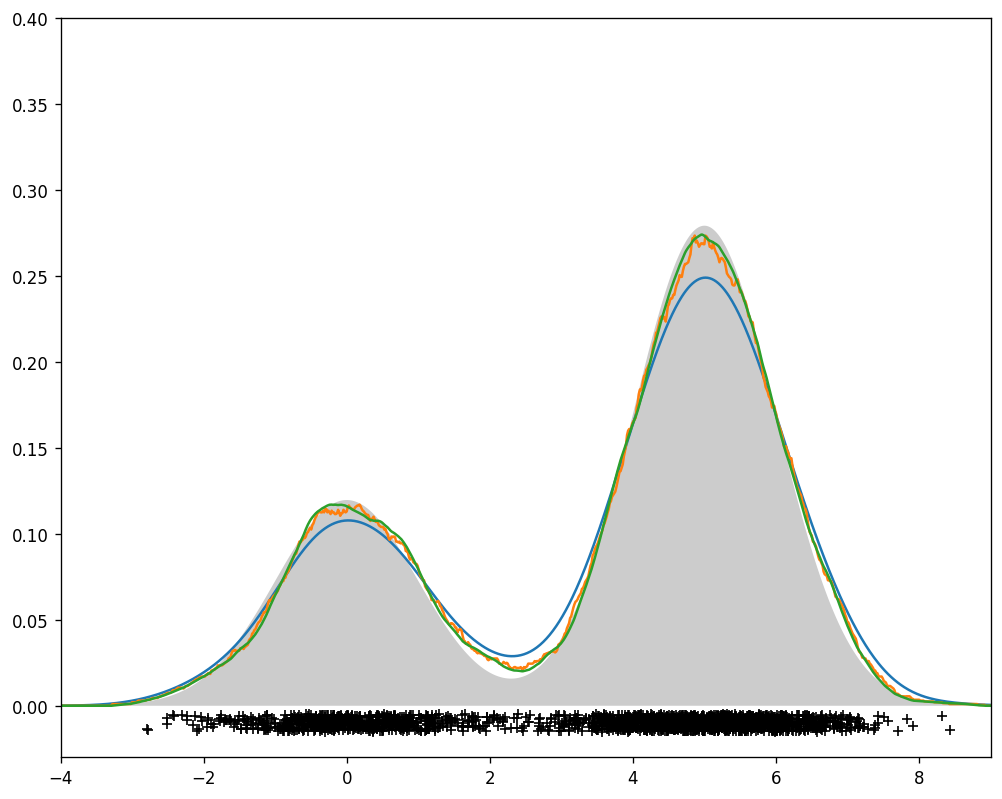

In [10]:
fig, ax = plt.subplots(facecolor='none')

# Plot the real distribution
ax.fill(X_plot, norm_linear, fc='black', alpha=0.2, label='convex combination')

# Use 3 different kernels to estimate
for kernel in ['gaussian', 'tophat', 'epanechnikov']:

    # Initial an object to use kernel function to fit data, bandwidth will    affect the result
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(norm_data.reshape(-1, 1))

    # Evaluate the density model on the data
    log_dens = kde.score_samples(X_plot.reshape(-1, 1))
    ax.plot(X_plot, np.exp(log_dens), '-', label="'{0}'".format(kernel))

# Add text on the plot, position argument can be arbitrary
# ax.text(6, 0.38, "N={0} points".format(N))
# Add a legend to the left outside of the plot 
# ax.legend(loc='upper left', bbox_to_anchor = (1,0.5))
# Plot the random points, squeeze them into narrow space
ax.plot(norm_data, -0.005 - 0.01 * np.random.random(norm_data.shape[0]), '+k')
# Set x-axis y-axis limit to adjust the figure
ax.set_xlim(-4, 9)
ax.set_ylim(-0.03, 0.4)
ax.set_facecolor('none')
fig.savefig('kernel_estimation.png', dpi=300, transparent = True, bbox_inches='tight')
plt.show()